* Convolutional Neural Networks (CNN)
* İmage Classification

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


## Loading the Data Set
* In this part we load and visualize the data.

In [5]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()
# 42000 fotoğraf , 785 column -->784 tane pixel 28*28 1 tane de label

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Ytrain label xtrain de pixel0-783

In [7]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head() # 784 tane label olmicak çünkü

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# toplam 70000 resim var 

In [13]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [15]:
# visualize number of digits classes
#plt.figure(figsize=(15,7))
#g = sns.countplot(Y_train, palette="icefire")
#plt.title("Number of digit classes")
#Y_train.value_counts()

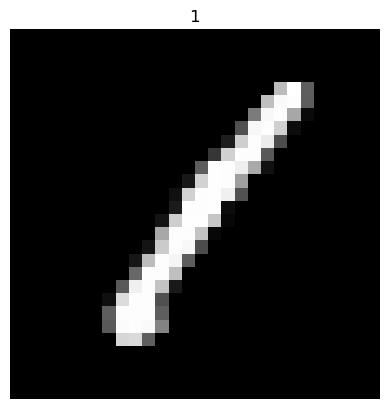

In [17]:
# plot some samples
img = X_train.iloc[0].to_numpy() # x train içinden 0.indexi alıp numpy haline getiriyoruz.Amaç herhangi seçtiğimiz birini görselleştirmek.
img = img.reshape((28,28))

plt.imshow(img, cmap='gray') # siyah beyaz
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()


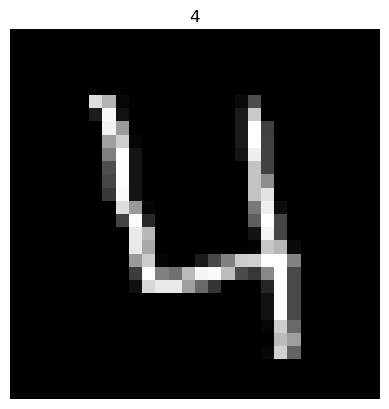

In [19]:
# plot some samples
img = X_train.iloc[3].to_numpy() # şimdi de index 3'ü görselleştirelim.
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()


## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]
* Normalizasyon yapmazsan farklı renklerden dolayı sıkıntı yaşayabilirsin.
* Her renk 0-255 arası idi biz bunu 0-1 arasına taşımak ve her rengi gray scale yapmak istiyoruz.
* Bir resmi normalize etmek demek onu grayscale'e çevirmek demektir.
* CNN hızını artırır
* 1 gray scale anlamına gelir
* keras 2 boyutlu resmi kabul etmez 3 boyutlu ister
* siyah beyaz değil de renkli olsaydı 28*28*3 dicektik RGB
* Makineye 5-6 şeklinde sayıları veremem 0-1 ler şeklinde vermem gerekir.

In [22]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape) # shape de herhangi bir değişiklik olmaz

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [24]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [26]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)


## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [28]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)
# train ve validation diye ayırıyoruz test kümesi tamamen izole 

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


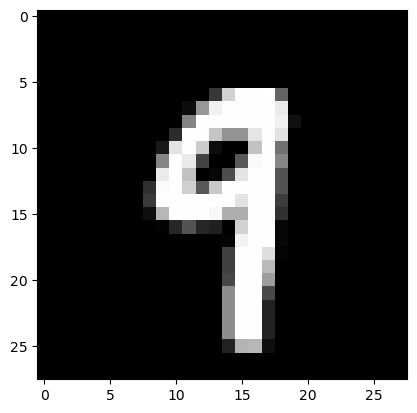

In [29]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 

![resim](12.jpg)

* İnput : kedi resmi Convolution layer : filtre; kedinin gözü,kulağı kuyruğunu vb. ayırt edebileceğim kısım
* kedinin gözünü kulağını falan bulduk filtre ile --> Convolution layer - feature maps
* pooling layer : cov. layerın sizeını kucultur yani kulağın kulak olduğunu anlmak için yeterli olan kısmı alır down sample yapar. Kocaman bir kulak yerine tek noktasına odaklanınca kedi ister amuda kalksın sağa sola baksın kulağı daha kolay şekilde bulurum.Bu şekilde overfitting yani bir datayı aşırı ezberi engellerim
* Dropout: Flatten--> Fully Connected --> 3'e 3 luk bir matrisi 9a 1 lik hale getirmek uzatmak gibi . Bu kısımda ANN kulanılacağı için flatten yapıyoruz.
* Sırasıyla --> input-filtre-eleme-filtre-eleme-ann   Featurlar çıktı artık hazırız
* 

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* ![resim](13.jpg)
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* ![resim](14.jpg)
* Kernel boyutu hyperparametredir.
* Filtreler karmaşık şekilleri ya da basit kenarları tespit etmeme yarayan şeylerdir.
* stride : filtrenin kaçar adım kayarak ilerleyeceğini belirler
* matris varsa kodumuz daha hızlı çalışır
* edge detect : çizgileri tespit eden filtedir.
* relu aktivasyon fonksiyonu nonlineerliği artırır
* 

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* ![resim](15.jpg)
* Size küçültüp veri kaybediyorduk.Padding yapınca size da değişiklik olmayacak ve bilgi kaybedilmeyecek.
* Padding yapmasam 3*3 olurdu
* Bilgi kaybetme ve boyut küçültme sorunu çözüldü. Eğer her conv da size küçülse bir sürü conv var output küçücük olur.
* 

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting. 
* ![resim](16.jpg)
* Bir öncekinde bilgi koruduk size aynı kaldı ama bu sefer de size büyük olunca yavaş çalışır.
* Bunun için max pooling down sampling yaparız . Kedi sağa sola bakabilir. Amuda kalkabilir.
* Overfittingi önlemek içinde max pooling yaparız.
* conv sonucu oluşan layer ---> max pooling ----> pooling layer

<a id="8"></a>
### Flattening
* numpy kütüphanesinde metodu var
* çıktısı ANN input olur
* ![resim](17.jpg)

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* ![resim](18.jpg)
* Fully connected kısmı ann kısmı softmax uygulanacak
* full de hepsi birbirne bağlanmalı ancak full demese hepsinin birbirine bağlanma zorunluluğu yok
* feature maplar giderek derinleşir. Conv layer ilk olarak basit şekilleri öğrenir.
* deep kısmı filtrelerimi öğrenebiliyorum
* kulak şöyle öğrensin diye filtre koymuyorum o kendi öğreniyor.
* 

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer) run etmesi kısa olsun diye bu şekilde bir model oluşturduk
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* Dropout random bir threshold değerine göre nöronların kapatılmasıdır.
* Ezberlemeyi önlemek ve çeşitliliği artırmak için önemlidir.
* ![resim](19.jpg)

In [62]:
# 
from sklearn.metrics import confusion_matrix
import itertools


# keras kütüphanesi
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # sequantial : layerları barındıran yapı , taslak
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.25)) # randomluk oranı 0.25 yani 4'te 1 kapat
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')) # # arkasında bir conv old. için inputu yazmaya gerek yok 
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # gezdirirken 2 -2 atlıcaz
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu")) # hidden layer 
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax")) # output layer
# sigmoid yerine softmax kullanıyorum daha gelişmişi . Sigmoid binary class için softmax multiply class için
# softmax : kedi : 0.7 köpek:0.2 araba :0.02 kamypn : 0.08 gibi
# yapıyı kurduk bir şeyler öğretmek istiyoruz. Optimize sayesinde yapıyorduk.

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate
* learning rate'i artırıp azaltıp öğrenmeyi daha iyi sağlıyoruz.

In [65]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* Hata çoksa weight , bias update ederiz.
* binary : iki tane  categorical : birden fazla
* <br>
<br>
* ![resim](20.jpg)


In [69]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks
* 10 resim var forward backward yapıcaz . Her seferinde batch 2 olunca 2 resmi yaparız. 1 epoch için 5 batch gerekir.

In [72]:
epochs = 10  # for better result increase the epochs
batch_size = 250

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* Overfittingi önlemek için farklı tarzdaki boyuttaki datasetlerini datasetimize eklememiz lazım.
* Veriyi zoom,döndürme,çevirme gibi yöntemlerle overfitting engellemek için datayı artırırız.
* ![resim](21.jpg)
    


In [75]:
# data augmentation
# hyperparametreler bunlar
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train) # datageni de fit ederek kendi x_train datamıza uyguluyoruz

<a id="16"></a>
### Fit the model
* modelimizi oluşturup train etmek anlamına geliyor

In [78]:
# Fit the model
# layer ekleme,batch değiştirme,epoch değiştirme
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 18s 93ms/step - loss: 2.2168 - accuracy: 0.1809 - val_loss: 1.7320 - val_accuracy: 0.3971
Epoch 2/10
151/151 [==============================] - 14s 89ms/step - loss: 1.9091 - accuracy: 0.3185 - val_loss: 1.1903 - val_accuracy: 0.6405
Epoch 3/10
151/151 [==============================] - 14s 91ms/step - loss: 1.7032 - accuracy: 0.4046 - val_loss: 0.8035 - val_accuracy: 0.8145
Epoch 4/10
151/151 [==============================] - 14s 94ms/step - loss: 1.5746 - accuracy: 0.4550 - val_loss: 0.6546 - val_accuracy: 0.8240
Epoch 5/10
151/151 [==============================] - 14s 89ms/step - loss: 1.4995 - accuracy: 0.4852 - val_loss: 0.5046 - val_accuracy: 0.8645
Epoch 6/10
151/151 [==============================] - 13s 89ms/step - loss: 1.4441 - accuracy: 0.5052 - val_loss: 0.4711 - val_accuracy: 0.8729
Epoch 7/10
151/151 [==============================] - 14s 91ms/step - loss: 1.3927 - accuracy: 0.5229 - val_loss: 0.4250 - val_accuracy:

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


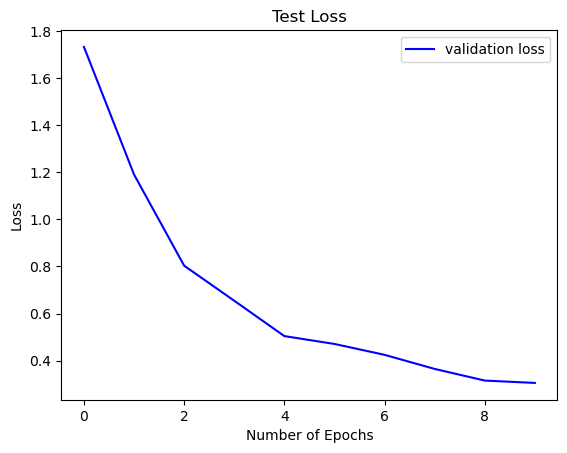

In [81]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 0s 2ms/step


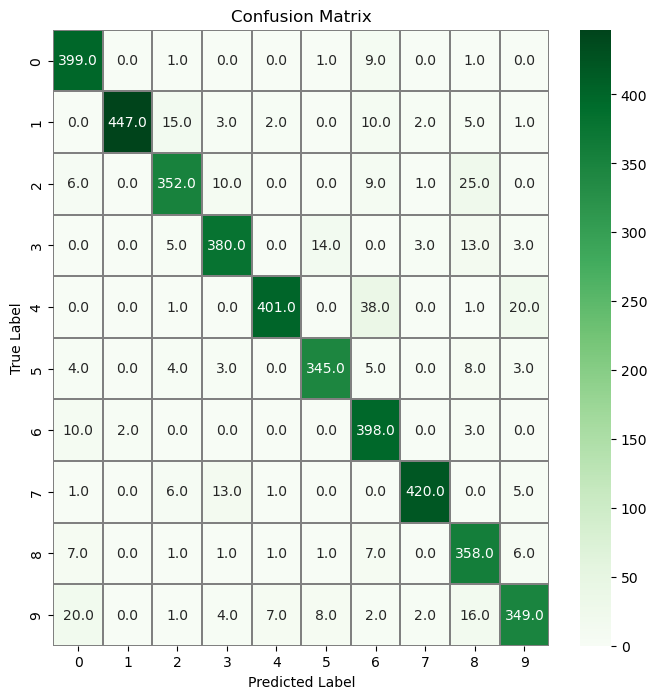

In [83]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 5 ve 3 çok karışmış mesela

In [85]:
# CNN with pytorch